In [5]:
import cv2 as cv
import mediapipe as mp
import time
import numpy as np
from matplotlib import pyplot as plt
import math
import os
import pathlib

In [6]:
segments = []
def segmentize(recording_arr):
    segments.append(recording_arr[0]) # top_1
    segments.append(recording_arr[math.floor(len(recording_arr)/2)]) # mid_1
    segments.append(recording_arr[len(recording_arr)-2]) # bot_1
    
    print("Passed")
    return True

In [7]:
def save_imgs():
    counter = 0
    for i in segments:
        cv.imwrite(f"{os.path.abspath(os.getcwd())}\\cnn_inputs\\input{counter}.png", i[0])
        counter += 1
    
    print("Images saved!")

In [8]:
# pose estimation drawing utilities
mpDraw = mp.solutions.drawing_utils
mpPose = mp.solutions.pose
pose = mpPose.Pose()

# One time camera snapshot
camera = cv.VideoCapture(0, cv.CAP_DSHOW)
_, cam_frame = camera.read()
camera.release()
cv.destroyAllWindows()
cam_shape = cam_frame.shape

# Recording ulitilites
tmp_img = np.zeros(cam_shape)
recording = []

# timer utilities
initial_time = time.time()
initial_ankle_pos = 0.01
isTimed = False
isRecording = False
camera = cv.VideoCapture(0, cv.CAP_DSHOW)
tmp_lmval =  0.1

monitor_val = 0.01
isTracking = False
rec_this = 0
while True:
    ret, frame = camera.read()

    imgRGB = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    results = pose.process(imgRGB)
    
    if results.pose_landmarks:
        mpDraw.draw_landmarks(frame, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h, w, c = frame.shape
    
            if id == 11: 
                tmp_lmval = round(lm.x, 1)
                
                
            if (not isTimed): # Set timer for 2 seconds
                initial_time = time.time()
                if id == 11: 
                    initial_ankle_pos = round(lm.x, 1)
            else: 
                if time.time() >= initial_time+2:
                    isRecording = True
                
                
            if tmp_lmval == initial_ankle_pos: 
                isTimed = True
            else:
                isTimed = False
            
            if isRecording:
                if id == 11:
                    recording.append((frame, round(lm.y, 1)))
                    #monitor_val = round(lm.x, 1)
                    rec_this = round(lm.y, 1)
                    
                    if monitor_val > rec_this:
                        isRecording = False
                        isTracking = segmentize(recording) 
                        monitor_val = 0.01
                        isTimed = False
                        initial_time = time.time()
                        initial_time2 = time.time()
                        
                    monitor_val = round(lm.y, 1)
            
            if isTracking:
                if id == 11:
                
                    if monitor_val < round(lm.y, 1) or recording[0][1] == round(lm.y, 1):
                        isTracking = False
                        recording.append((frame, round(lm.y, 1)))
                        segments.append(recording[len(recording)-1])
                        save_imgs()
                        print("Passed2")
                
                
          
        
#     cv.imshow("Realtime", cv.putText(frame, f"{isRecording}prev:{monitor_val}curr:{rec_this}isTr{isTracking}", (40, 50), cv.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 2))
    key = cv.waitKey(1)
    
    if key == ord('q'):
        key = cv.waitKey()
        camera.release()
        cv.destroyAllWindows()
        break
        

0.5


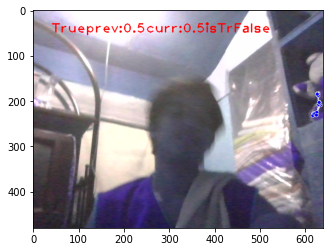

0.9


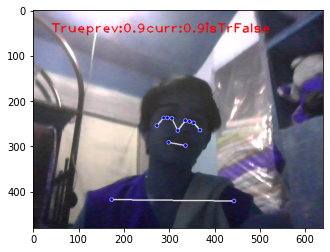

0.9


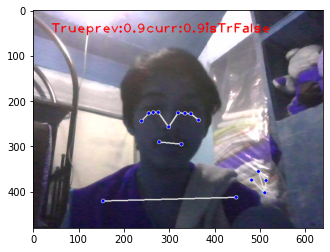

0.9


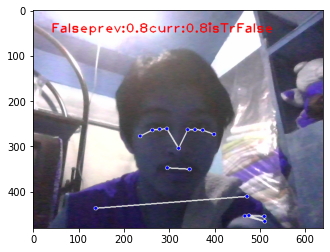

0.5


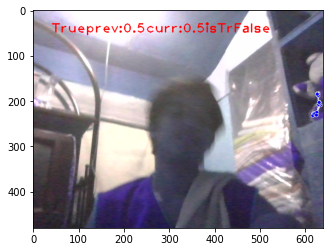

0.9


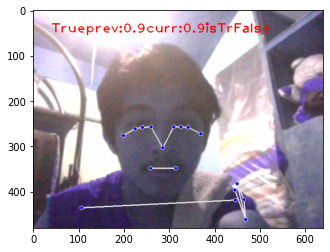

0.9


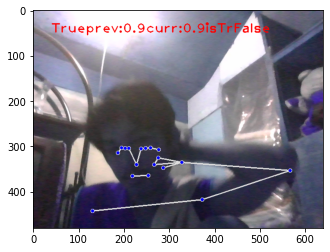

0.9


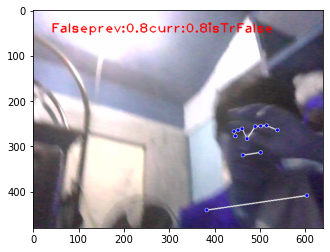

In [10]:
for i in segments:
    print(i[1])
    plt.imshow(i[0])
    plt.show()